In [18]:
import pandas as pd

data = pd.read_csv(r'./news.csv')

In [28]:
data = data[['text','label']][:2000]
data.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


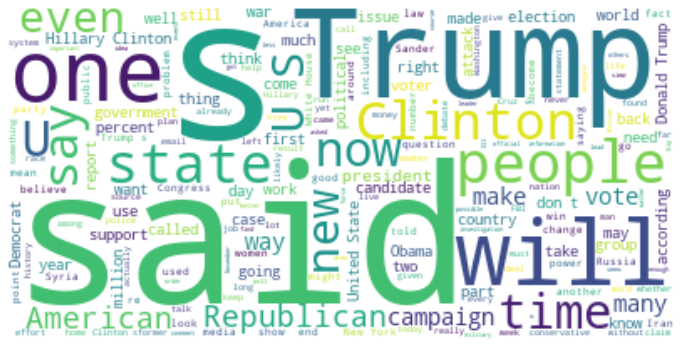

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text=' '.join(data['text'])
my_stopwords = set(STOPWORDS)
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(text)
plt.figure(figsize=(12,10))
plt.axis("off")
plt.imshow(my_cloud, interpolation='bilinear')

In [30]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
port=WordNetLemmatizer()

In [31]:

def preprocess(text):
    def tokenizing(text2):
        return word_tokenize(text2)
    
    def removeword(text3):
        return [w for w in text3 if not w in stop_words]
    
    def stemming(removeStopWords):
        return [port.lemmatize(word) for word in removeStopWords]
    
    return " ".join(stemming(removeword(tokenizing(re.sub(r'[^\w\s]', '', text.lower())))))

In [32]:
preprocess_text = data.text.apply(preprocess)

In [33]:
preprocess_text.head()

0    daniel greenfield shillman journalism fellow f...
1    google pinterest digg linkedin reddit stumbleu...
2    u secretary state john f kerry said monday sto...
3    kaydee king kaydeeking november 9 2016 lesson ...
4    primary day new york frontrunners hillary clin...
Name: text, dtype: object

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(preprocess_text)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
X=pd.DataFrame(values.toarray(), columns = feature_names)
X

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,0002,0005s,0007s,005,006,007010,01,0104,010608,...,ťtwostateť,ťwho,ελληνικά,октября,русский,эa,эin,эthe,яркий,عربي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
y = label_encoder.fit_transform(data.label)

In [36]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [45]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
GB = gnb.predict(X_test)
GB_Accuracy=metrics.accuracy_score(y_test, GB)
print("Accuracy:",GB_Accuracy)


Accuracy: 0.765


In [46]:
gbr=classification_report(y_test,GB)
print(gbr)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       318
           1       0.75      0.76      0.75       282

    accuracy                           0.77       600
   macro avg       0.76      0.76      0.76       600
weighted avg       0.77      0.77      0.77       600



In [47]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()

#Train the model using the training sets
mnb.fit(X_train, y_train)

#Predict the response for test dataset
MB = mnb.predict(X_test)
mb_Accuracy=metrics.accuracy_score(y_test, MB)
print("Accuracy:",mb_Accuracy)


Accuracy: 0.8083333333333333


In [48]:
mbr=classification_report(y_test,MB)
print(mbr)

              precision    recall  f1-score   support

           0       0.98      0.65      0.78       318
           1       0.72      0.98      0.83       282

    accuracy                           0.81       600
   macro avg       0.85      0.82      0.81       600
weighted avg       0.85      0.81      0.80       600

